In [1]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
100% 120M/121M [00:06<00:00, 19.0MB/s]
100% 121M/121M [00:06<00:00, 19.5MB/s]


In [2]:
import zipfile
!unzip -q "/content/face-expression-recognition-dataset.zip"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [4]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from keras.models import Sequential
from keras.layers import *

In [6]:
# laod images

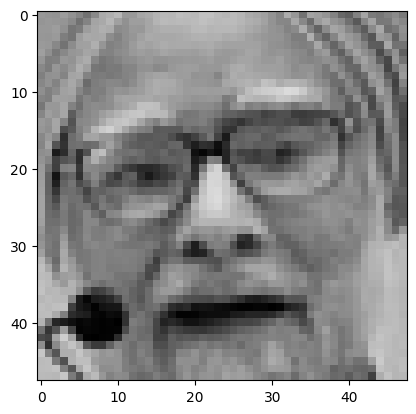

In [7]:
plt.imshow(image.load_img("/content/images/train/angry/1.jpg"))

In [8]:
# train images
# val
train_path  = "/content/images/train"
val_path = "/content/images/validation"
batch_size = 256

In [9]:
# images generator class

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(56, 56),
        color_mode="grayscale",
        batch_size=batch_size,
        class_mode='categorical',
        shuffle = True)

validation_generator = test_datagen.flow_from_directory(
        val_path,
        target_size=(56, 56),
        color_mode="grayscale",
        batch_size=batch_size,
        class_mode='categorical',
        shuffle = True)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [12]:

# make CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(56, 56,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 56, 56, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 7, 7, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [13]:
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(train_generator, epochs = 50, validation_data = validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 55s 275ms/step - accuracy: 0.2430 - loss: 1.9770 - val_accuracy: 0.1824 - val_loss: 1.9716
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 120ms/step - accuracy: 0.3900 - loss: 1.5862 - val_accuracy: 0.2948 - val_loss: 1.9223
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.4700 - loss: 1.3862 - val_accuracy: 0.3288 - val_loss: 1.6985
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.5131 - loss: 1.2746 - val_accuracy: 0.4686 - val_loss: 1.4447
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.5436 - loss: 1.1897 - val_accuracy: 0.4936 - val_loss: 1.2959
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.5656 - loss: 1.1484 - val_accuracy: 0.5481 - val_loss: 1.1995
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - accuracy: 0.5756 - loss: 1.1104 - val_accuracy: 0.5675 - val_loss: 1.1387
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - accuracy: 0.5899 - loss: 1

In [15]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))

In [16]:
# fro user

In [17]:
from keras.utils import load_img , img_to_array

In [18]:
path ='/content/images/validation/angry/10052.jpg'

In [19]:
image = load_img(path, color_mode='grayscale', target_size = (56, 56))

In [20]:
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])

In [21]:
input_arr.shape

(1, 56, 56, 1)

In [22]:
index = model.predict(input_arr).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step


In [23]:
index

np.int64(2)